<a href="https://colab.research.google.com/github/uday1257/AIML-LAB/blob/main/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

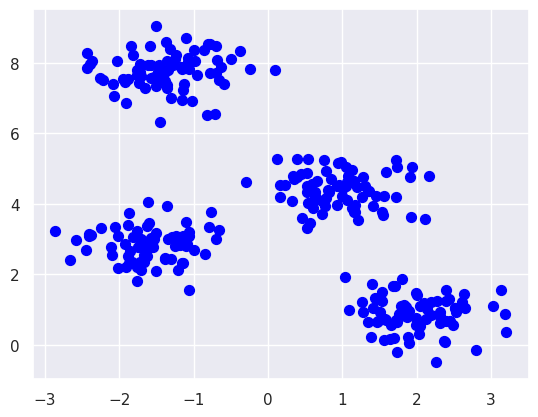

Accuracy score for KMeans: 0.5


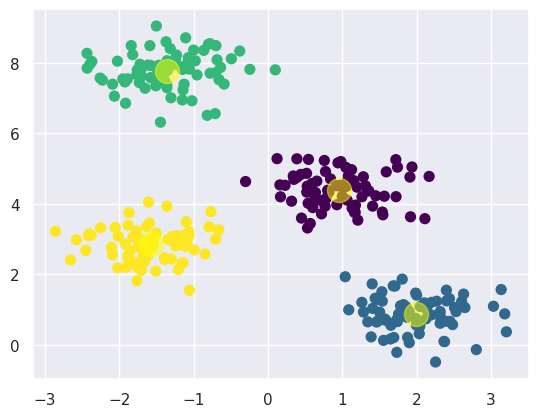

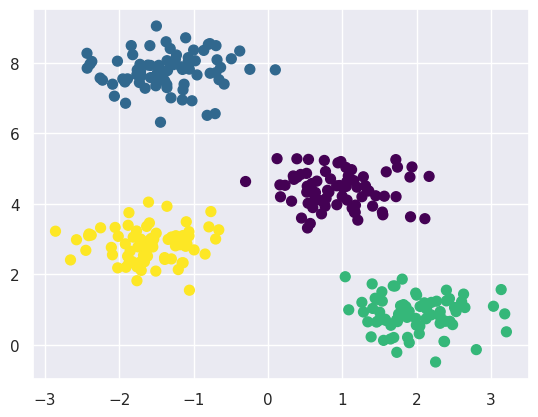

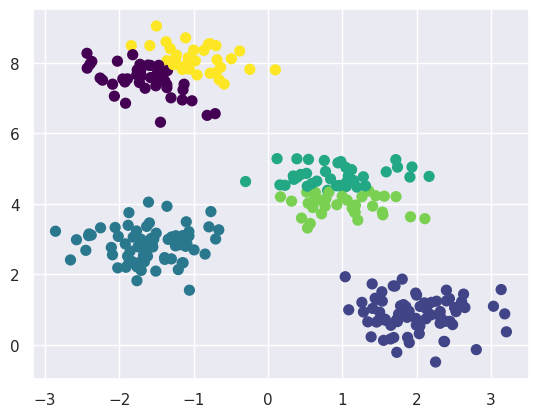

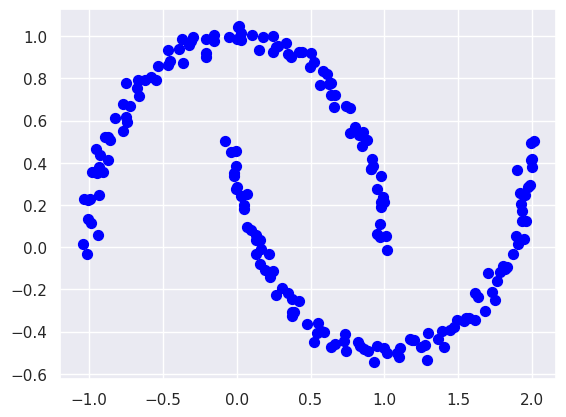

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


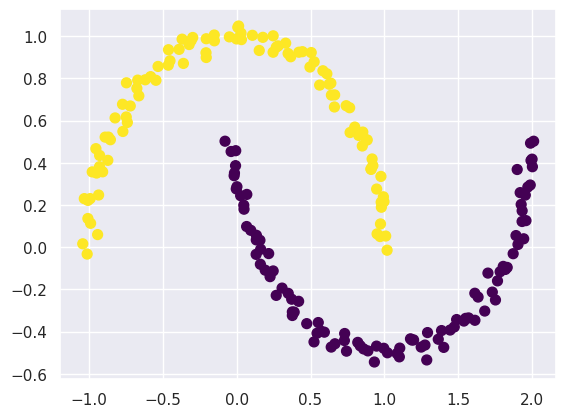

Spectral Clustering accuracy score: 0.0


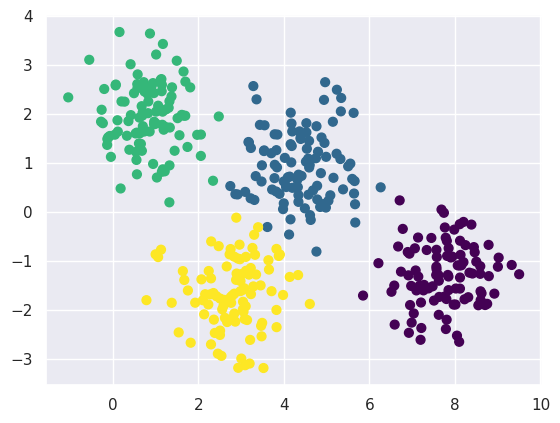

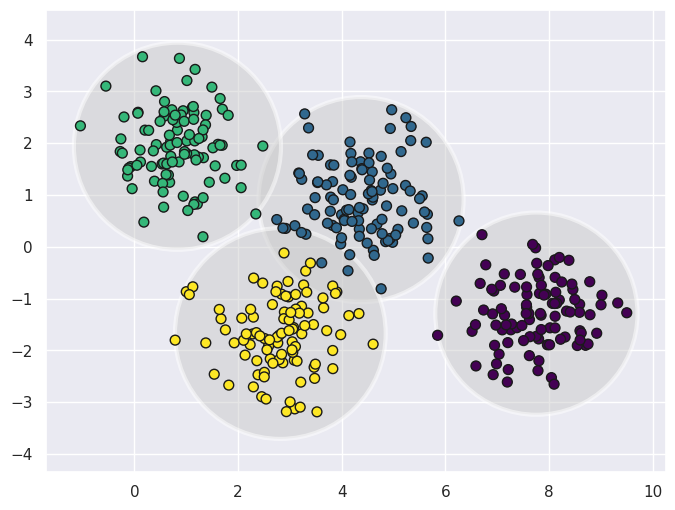

First 5 probabilities:
 [[0.022 0.978 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.999 0.    0.001]
 [0.    0.    0.    1.   ]]


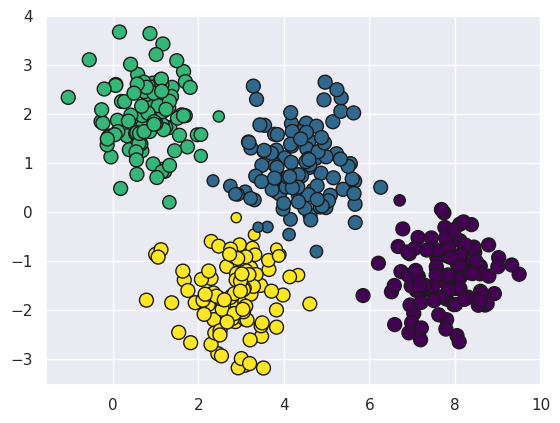

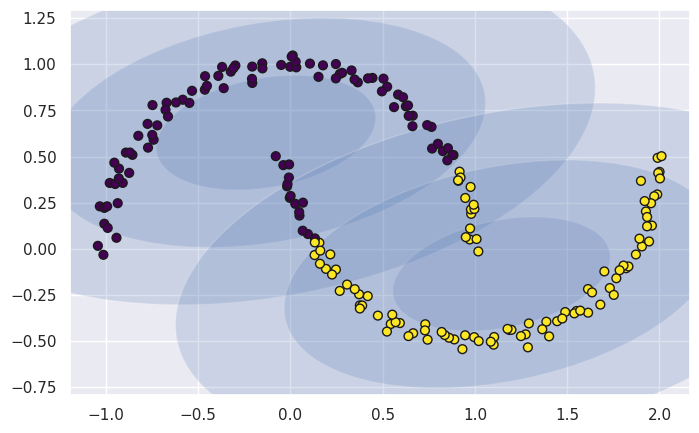

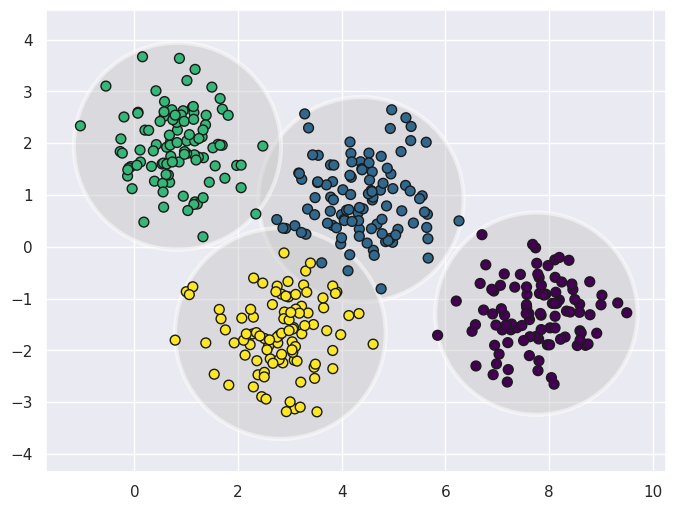

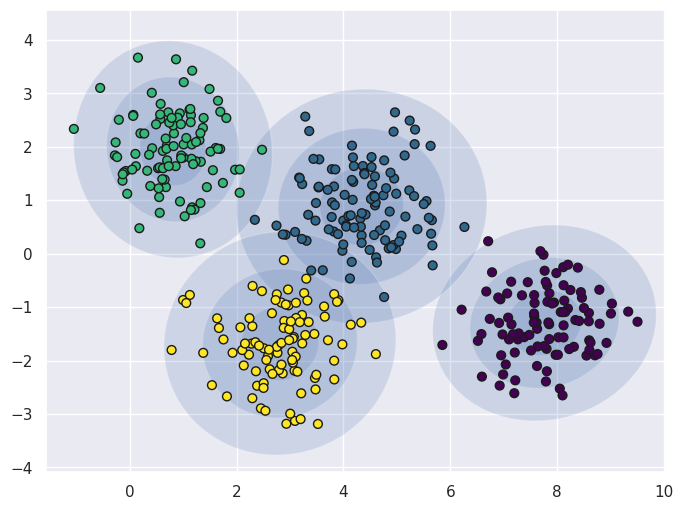

<ipython-input-1-ef0d61bac723>:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', edgecolor='k', zorder=2)


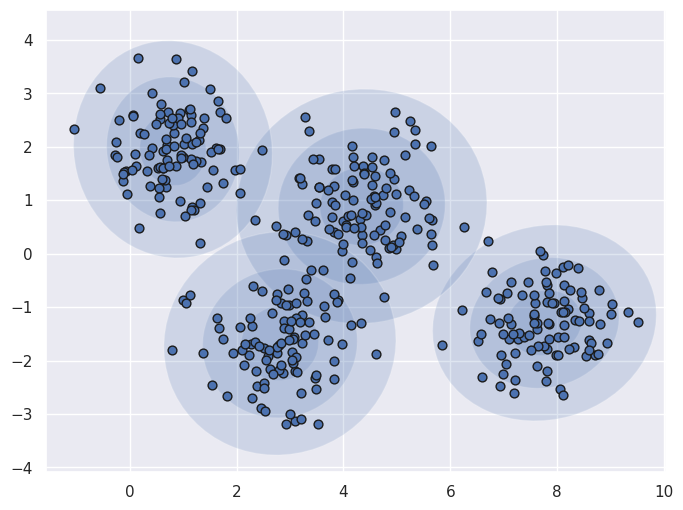

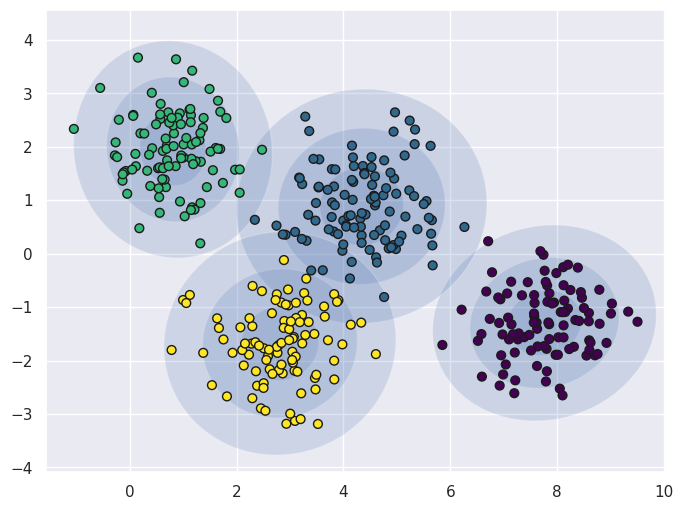

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Plot styling
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Generate blob dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, color='blue')
plt.show()

# KMeans clustering and accuracy calculation
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print("Accuracy score for KMeans:", accuracy_score(y_kmeans, y_true))

# Plot the clustered data with cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)
plt.show()

# Function to find clusters manually
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

# KMeans with 6 clusters
labels = KMeans(6, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

# Generate moons dataset and cluster using Spectral Clustering
X_moons, y_moons = make_moons(200, noise=0.03, random_state=0)
plt.scatter(X_moons[:, 0], X_moons[:, 1], s=50, color='blue')
plt.show()

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X_moons)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels, s=50, cmap='viridis')
plt.show()
print("Spectral Clustering accuracy score:", accuracy_score(labels, y_moons))

# Generate and plot blobs with KMeans clusters
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)
X = X[:, ::-1]  # Flip axes for better plotting
kmeans = KMeans(4, random_state=0, n_init=10)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show()

# Function to plot KMeans clustering with cluster boundaries
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k', zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plt.figure(figsize=(8, 6))
plot_kmeans(kmeans, X)

# Gaussian Mixture Model for blobs
gmm = GaussianMixture(n_components=4, random_state=0)
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show()

# Display the probability for each component
probs = gmm.predict_proba(X)
print("First 5 probabilities:\n", probs[:5].round(3))
size = probs.max(1) * 100
plt.scatter(X[:, 0], X[:, 1], c=labels, s=size, cmap='viridis', edgecolor='k')
plt.show()

# Draw ellipses for Gaussian Mixture Model
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs))

# Plot Gaussian Mixture Model with ellipses
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit_predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', edgecolor='k', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', edgecolor='k', zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)

# Gaussian Mixture on moons dataset
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plt.figure(figsize=(8, 5))
plot_gmm(gmm2, X_moons)
plt.show()

plt.figure(figsize=(8, 6))
plot_kmeans(kmeans, X)
plt.show()  # Add explicit plt.show()

# GMM with ellipses on original data
plt.figure(figsize=(8, 6))
plot_gmm(gmm, X)
plt.show()

# GMM without labels
plt.figure(figsize=(8, 6))
plot_gmm(gmm, X, label=False)
plt.show()

# GMM with labels and ellipses
plt.figure(figsize=(8, 6))
plot_gmm(gmm, X, label=True)
plt.show()